# Part I - Exploring Loan Data by Prosper
## by Koketso Diale

## Introduction

> In this study we will be exploring the Loan Data by Prosper which contains various historical financial data regarding loans.

> We will attempt to find insights such as :

   * Which features can contribute to a load being approved ?
   * Which correlations exists between the features ?
   * Which time periods (annual and seasonal) had more loan requests and approvals ?

## Preliminary Wrangling

In [1]:
# Update packeges
!pip install --upgrade numpy
!pip install --upgrade matplotlib
!pip install --upgrade pandas
!pip install --upgrade seaborn

    100% |████████████████████████████████| 13.4MB 2.9MB/s eta 0:00:01  7% |██▎                             | 942kB 22.2MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
    100% |████████████████████████████████| 11.5MB 3.0MB/s eta 0:00:01 1% |▍                               | 153kB 6.8MB/s eta 0:00:02
    100% |████████████████████████████████| 1.1MB 10.0MB/s ta 0:00:01
    100% |████████████████████████████████| 49.4MB 774kB/s eta 0:00:01  4% |█▍                              | 2.1MB 22.7MB/s eta 0:00:03    22% |███████                         | 10.9MB 25.1MB/s eta 0:00:02    26% |████████▌                       | 13.2MB 26.0MB/s eta 0:00:02    29% |█████████▎                      | 14.3MB 22.4MB/s eta 0:00:02    36% |███████████▋                    | 17.9MB 23.4MB/s eta 0:00:02    45% |██████████████▌           

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
# Download Data
#!wget 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv

In [50]:
# Load in the dataset
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# dataframe shape and datatypes
loan_df.shape

(113937, 81)

In [6]:
loan_df.dtypes.value_counts()

float64    50
object     17
int64      11
bool        3
dtype: int64

#### What is the structure of your dataset?

> This dataset contains 81 features (columns) and 113937 entries (rows) (113937, 81).

> About 50 features are of dtype float64, 17 are object(str) , 11 int64 and 3 of type bool.

> Note : All the date features are of type object(str), it will be necessary to cast them into datetime format for timeseries analysis.

> Key features to be explored:
   1. BorrowerState - The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.     
   2. LoanStatus - The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
   3. Occupation - The Occupation selected by the Borrower at the time they created the listing.
   4. EmploymentStatus - The employment status of the borrower at the time they posted the listing. 
   5.EmploymentStatusDuration - The length in months of the employment status at the time the listing was created.
   6. IsBorrowerHomeowner - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
   7. ProsperRating (Alpha) - The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
   8. AvailableBankCardCredit - The total available credit via bank card at the time the credit profile was pulled.
   9. LoanOriginalAmount - The origination amount of the loan.
   10. Investors - The number of investors that funded the loan.
   11. IncomeRange - The income range of the borrower at the time the listing was created.
   12. IncomeVerifiable - The borrower indicated they have the required documentation to support their income.
   13. StatedMonthlyIncome - The monthly income the borrower stated at the time the listing was created.
   14. LenderYield - The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

> Supporting features:

* LoanNumber - Unique numeric value associated with the loan.
* LoanOriginationDate - The date the loan was originated.
* LoanKey - Unique key for each loan. This is the same key that is used in the API.
* Term - The length of the loan expressed in months.
* TotalProsperPaymentsBilled - Number of on time payments the borrower made on Prosper loans at the time they created this listing. This value will be null if the borrower had no prior loans.

# Univariate Exploration

#### Question #1: Which State occurs in the most frequency in this dataset ?

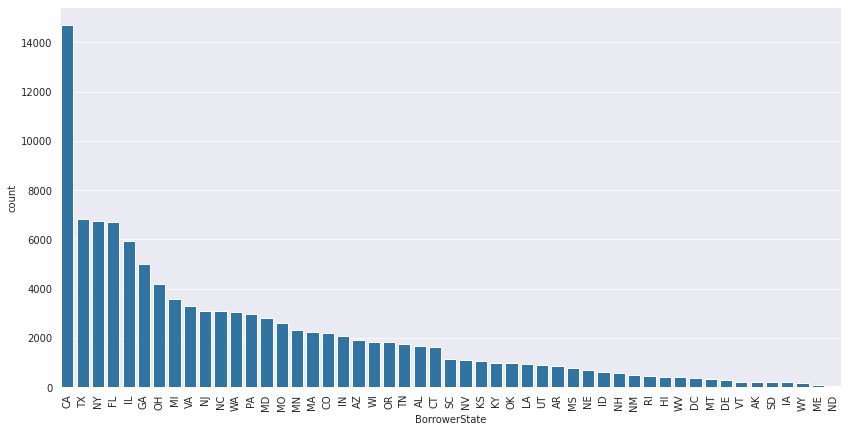

In [7]:
# Plot the frequencies
states = loan_df.BorrowerState.value_counts()
states_order = states.index
plt.figure(figsize=(14,7))
base_color = sns.color_palette()[0]
sns.countplot(data=loan_df, x='BorrowerState', color=base_color, order=states_order)
plt.xticks(rotation=90)
plt.show()

> Notes: Canada has an unusually higher number of frequencies compared to other states twice as high as the second highest record

#### Question #2: How many Investors do most loans have ?

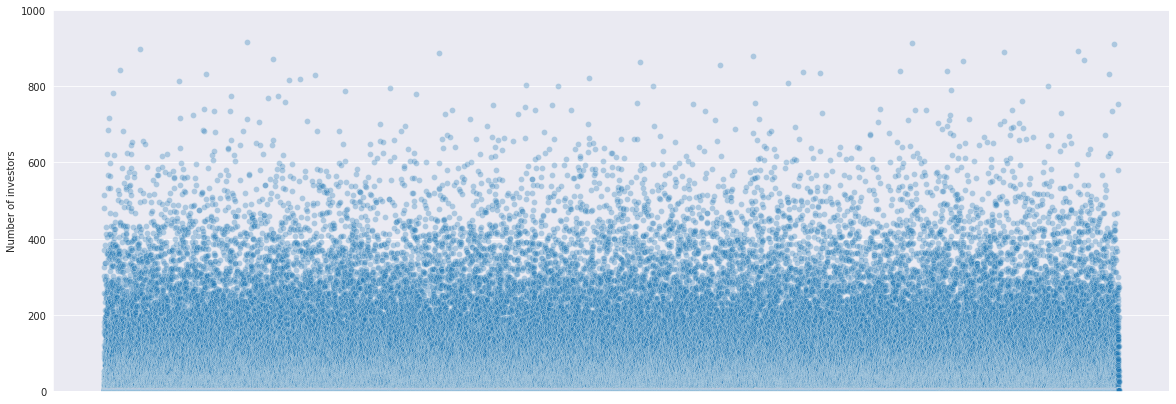

In [8]:
investors = loan_df.Investors
plt.figure(figsize=(20,7))
sns.scatterplot(x=investors.index, y=investors.values,
                alpha=0.3, y_jitter=0.2)
plt.xticks([])
plt.ylabel('Number of investors')
plt.ylim(0, 1000)
plt.show();

> Note: Most loans seem to have about 200 or so investors backing them.

#### Question #3: What proportion of Borrowers are home owners ?

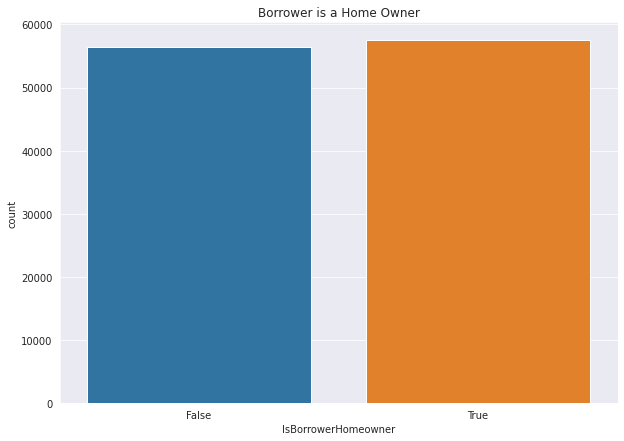

In [9]:
plt.figure(figsize=(10, 7))
plt.title('Borrower is a Home Owner')
sns.countplot(data=loan_df, x='IsBorrowerHomeowner')
plt.show();

> Note: Only a slightly higher number of borrowers are home owners

#### Question #4: How many entries have people who are currently employed ?

In [10]:
employed = loan_df['EmploymentStatus'].value_counts()
employed

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

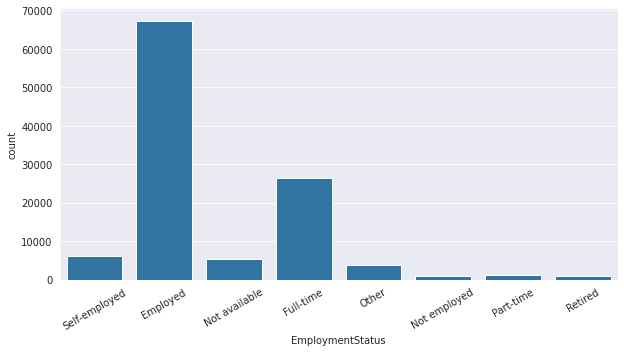

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=loan_df, x='EmploymentStatus', color=base_color)
plt.xticks(rotation=30)
plt.show()

> Note: Most of the loans were taken by borrowers who are employed with full-time employees coming second.

#### Question #5: How long have most of the borrowers been employed for ?

In [12]:
employment_duration = loan_df['EmploymentStatusDuration']

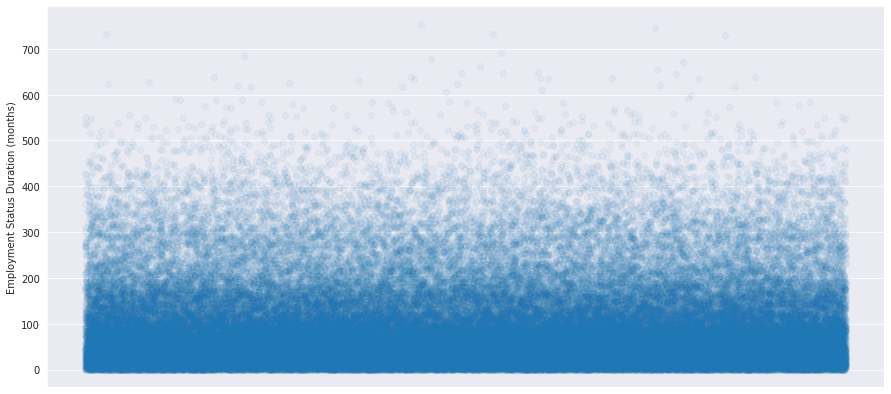

In [13]:
plt.figure(figsize=(15, 7))
plt.scatter(data=loan_df, x=employment_duration.index,
            y='EmploymentStatusDuration', color=base_color,
           alpha=0.05)
plt.ylabel("Employment Status Duration (months)")
plt.xticks([])
plt.show()

> Note: Most borrowers had been employed for 150 months or less.

> The years in the table have an incorrect datatype object string so we will convert them todatetime64

In [14]:
loan_df['LoanOriginationDate'] = loan_df['LoanOriginationDate'].astype('datetime64[ns]')

In [15]:
# Check dtype
loan_df['LoanOriginationDate'].dtype

dtype('<M8[ns]')

#### Question #6: Did all the years have a similar number of loan request ?

In [16]:
# Plot graph of LoanOriginationDate
creation_per_year = loan_df.groupby(['LoanOriginationDate']).size()
creation_per_year

LoanOriginationDate
2005-11-15      1
2005-11-18      1
2005-11-22      2
2005-11-23      1
2005-11-25      2
             ... 
2014-03-06    237
2014-03-07    263
2014-03-10    259
2014-03-11    277
2014-03-12     41
Length: 1873, dtype: int64

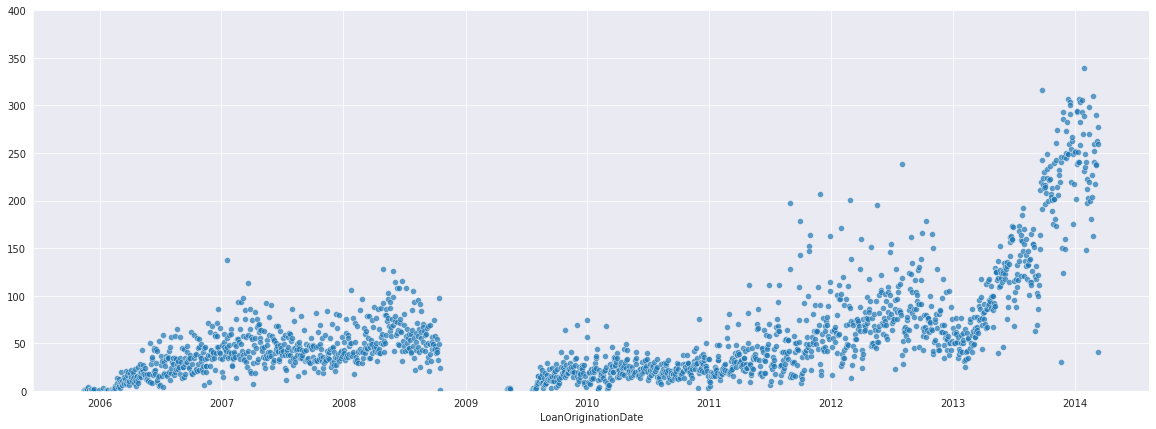

In [17]:
plt.figure(figsize=(20, 7))
sns.scatterplot(data=creation_per_year, alpha=0.7)
plt.ylim(0, 400)
plt.show();

> Note: Later years had higher number of entries however there seems to be a gap in the period around 2009. Missing data points or an effect of the 2008 recession ?

#### Question 7: What is the mean ProsperRating (Alpha) ?

In [18]:
ratings = loan_df['ProsperRating (Alpha)'].value_counts()
ratings_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

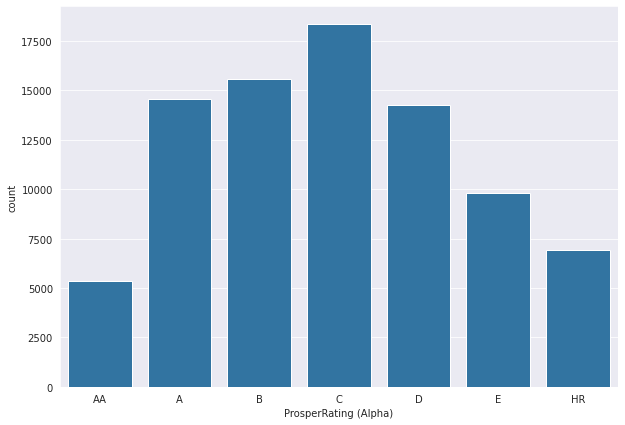

In [51]:
plt.figure(figsize=(10, 7))
sns.countplot(data=loan_df, x="ProsperRating (Alpha)", order=ratings_order, color=base_color)
plt.show();

> The plots have given us some insight into the dataset however some information is still ambiguos. To get a clearer picture of what is going on we need to compare them against other features. AvailableBankcardCredit might inform us why some borrowers were approved for the loan along with the StatedMonthlyIncome. Additionally there maybe a correlation with the borrower's given Occupation. In may also be insightful to check the IncomeRange 's of all the paticipants. For consistency we will also compare them to

### Findings:

> `BorrowerStat`e - CA has many more people borrowing money than other states, this maybe due to a bias not immediatly obvious.

> `Investors` - Most entries have about 200 investors however there are outliers of about more than 1000 - 1200 investors.

> `IsBorrowerHomeowner` - Has a slightly higher amount of entries where borrowers are home owners.

> `EmploymentStatus` - Has a majority of entries who are currently employed this may be due to employment requirements required to get access to the loan.

> `EmploymentStatusDuration` - Has a majority clustered around 200 working months and below this makes sense as most of the loans would be aquired by the working class.

> `LoanOriginationDate` - Most loans seem to have been requested in the later year however there is an inexplicable gap between 2009 - 2010 which does not seem to be a transformation issue.

> `ProsperRating (Alpha)` - The graph exibits properties of a normal distribution with the Average rating C having the most entries.

>The data used in this section was fairly tidy, no adjustments were required although some data from the `Investor`s column had outliers.

> The order of `ProsperRating (Alpha)` had to be altered when plotting to indicate their positional encodings as the categories have values with HR being the lowest ranking and AA having the highest.

> `LoanOriginationDate` required the sizes of the counts to be aggregated as we need to plot all the entries grouped by the years.

> `EmploymentStatusDuration` required to be aggregated in order to represent continuous values.

> `BorrowerState, IsBorrowerHomeowner & EmploymentStatus` required to be aggregated in order to represent categories with no positional encoding

## Bivariate Exploration

> Does the AvailableBankcardCredit influence the ProsperRating ?

<Figure size 720x504 with 0 Axes>

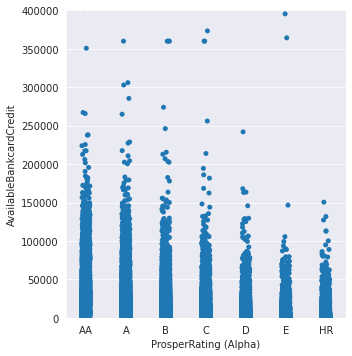

In [20]:
# Plot AvailableBankcardCredit vs ProsperRating (Alpha)
plt.figure(figsize=(10, 7))
sns.catplot(data=loan_df, x='ProsperRating (Alpha)', y='AvailableBankcardCredit',
           order=ratings_order, color=base_color)
plt.ylim(0, 400000)
plt.show()

> Do Home Owners attract more investors ?

<Figure size 720x504 with 0 Axes>

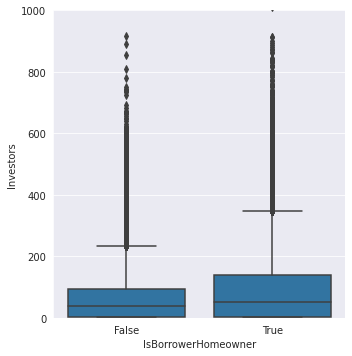

In [21]:
# Plot Investors vs IsBorrowerHomeowner
plt.figure(figsize=(10, 7))
sns.catplot(data=loan_df, x='IsBorrowerHomeowner', y='Investors',
            color=base_color, kind='box')
plt.ylim(0, 1000)
plt.show()

> Are more investors sending money to people who've main loan repayments ?

<Figure size 1440x504 with 0 Axes>

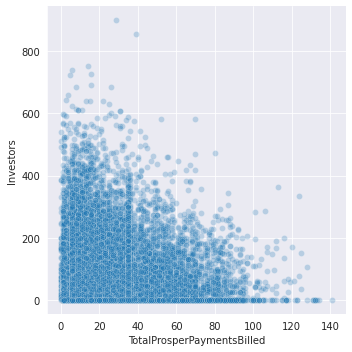

In [22]:
# plot TotalProsperPaymentsBilled vs Investors 
plt.figure(figsize=(20, 7))
sns.relplot(data=loan_df, x='TotalProsperPaymentsBilled', y='Investors',
           alpha=0.25)
plt.show()

> Which Rating has the most TotalProsperPaymentsBilled ?

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='TotalProsperPaymentsBilled'>

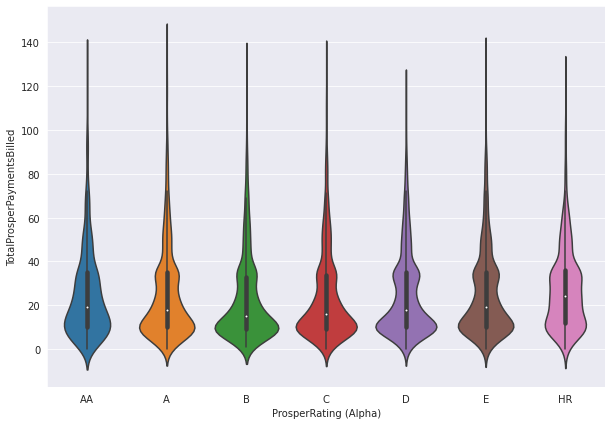

In [23]:
# Plot TotalProsperPaymentsBilled vs ProsperRating (Alpha)
plt.figure(figsize=(10, 7))
sns.violinplot(data=loan_df, x='ProsperRating (Alpha)', y='TotalProsperPaymentsBilled',
              order=ratings_order)

> Which State has the Highest mean StatedMonthlyIncome ?

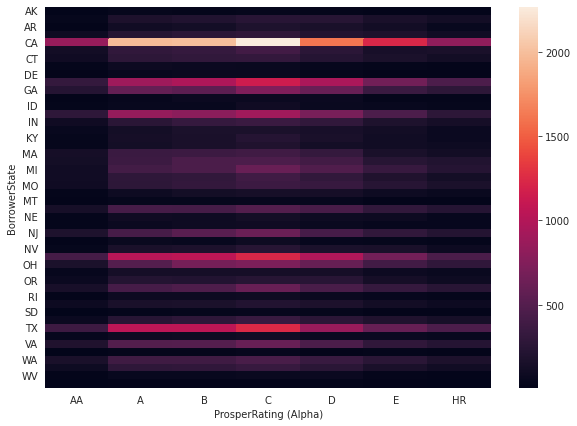

In [44]:
ratings_by_state = loan_df.groupby(['BorrowerState','ProsperRating (Alpha)']).size()

ratings_by_state = ratings_by_state.reset_index(name='count')

ratings_by_state = ratings_by_state.pivot(index = 'BorrowerState', columns = 'ProsperRating (Alpha)', values = 'count')

ratings_by_state = ratings_by_state.reindex(columns=['AA', 'A', 'B', 'C', 'D', 'E', 'HR'])

plt.figure(figsize=(10, 7))

sns.heatmap(ratings_by_state)

plt.show()

### Findings:

> The ProsperRating has a possitiive correlation with AvailableBankcardCredit.

> More Investors invest in home owner's loans.

> Less Investors invest in borrowers who previously had other loan payments.

> Most people in the HR Rating rank are people who previously had other loan commitments.

> Canada has the highest mean of high ProsperRatings.

> The minority is in Rank AA.

## Multivariate Exploration

> What is the distrbution of ProsperRating and AvailableBankcardCredit with regard to EmploymentStatus ?

<Figure size 1440x504 with 0 Axes>

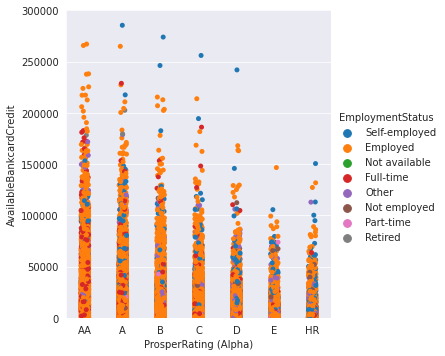

In [57]:
# Plot ProsperRating (Alpha) vs AvailableBankcardCredit vs EmploymentStatus

plt.figure(figsize=(20,7))
sns.catplot(data=loan_df, x='ProsperRating (Alpha)', y='AvailableBankcardCredit', hue='EmploymentStatus',
           order=ratings_order)
plt.ylim(0, 300000)
plt.show();

> What is the relationship between LoanOriginationDate and Investors with regard to TotalProsperPaymentsBilled ?

<Figure size 1440x504 with 0 Axes>

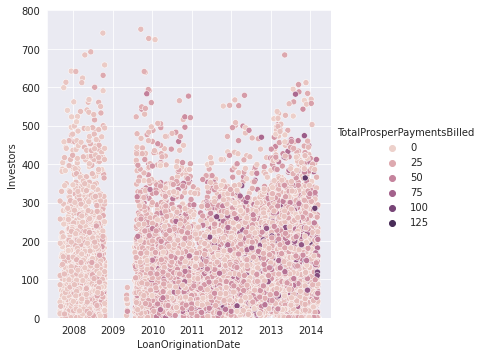

In [26]:
plt.figure(figsize=(20, 7))
sns.relplot(data=loan_df, x='LoanOriginationDate', y='Investors', hue='TotalProsperPaymentsBilled')
plt.ylim(0, 800)
plt.show();

> How is ProsperRating and EmploymentDuration distributed across IsHomeOwner ?

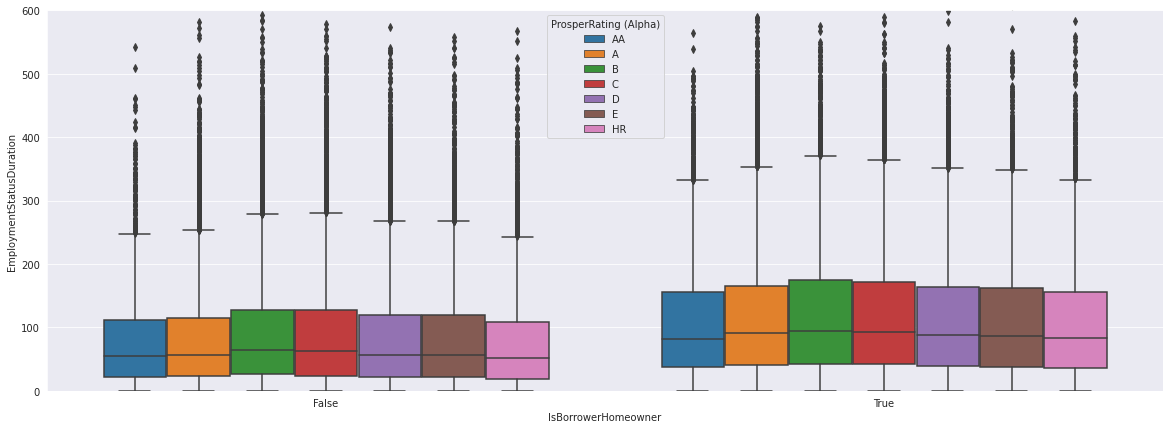

In [59]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=loan_df, x='IsBorrowerHomeowner', y='EmploymentStatusDuration'
            , hue='ProsperRating (Alpha)', hue_order=ratings_order)
plt.ylim(0, 600)
plt.show();

### Findings:

> There is a strong correlation between ProsperRating and AvailableBankcardCredit with regard to EmploymentStatus as most of the borrowers who belong to the AA rank are also Employed and thus had the Highest available credit balance.

> There is also a strong correlation between ProsperRating, EmploymentDuration and IsBorrowerHomeOwner as most home owners also had a longer Employment Duration and higher mean ProsperRatings.

> LoanOriginationDate and Investors revealed that in the period from late 2008 - 2009 due to lower TotalProsperPaymentsBilled most investors probably did not benefit however no data was recorded during this period so it is hard to confirm.

## Conclusions

> In this study, key variables were selected to be explored for possible insights to better understand the information. The data was tidy but alterations such as changing datatypes were done where necesary. Then the chosen features were visualized for possible insights. Univariate analysis was performed first to see how the data was distributed on it's own an this revealed the initial insights from the single variables. For insights than were conclusive, a further bivariate analysis was performed to explore correlations between the variables to see where the insights would converge and visa versa. Finally these insights led to the key insights found through multivariate analysis to shed light where 3 or more variables could be used to discover even more insights. The few features explored in this study revealed the following:

* Canada had the highest number of entries although why this was was not immediatly obvious.
* Borrowers who are home owners have a slightly higher number of entries than their counterparts.
* Most loans had investors of between 200 and 250.
* Most loan entries were by borrowers who are Employed.
* Later years around 2013 - 2014 had the most entries although this cannot be confirmed as data was not fully recorded pre-2009.
* The ProsperRating which is a metric that is used to approve the loans had a normal distribution, with most of the entries belonging to the Mid-Class rank.
* There is a strong correlation between the ProspectRating and the AvailableBankcardCredit which is the credit amount which was recorded at the time of the loan request.
* Most investors are distributed amongst home owners perhaps property investments.
* Canada has the highest number of Higher ranked ProsperRanking borrowers explaining the high frequency observed earlier.
* There is a very strong correlation between ProsperRating (Alpha), AvailableBankcardCredit and EmploymentStatus.
* This is probably due a higher frequency of jobs in the state and the economic ecosystem.